In [121]:
import wget

wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

'housing (3).csv'

In [122]:
#loading data frame
import os

file = os.getcwd() + '/housing.csv'
#os.listdir()
print(file)
#df_housing =

/Users/gaby/Desktop/Repos/zoomcamp/housing.csv


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [124]:
import pandas as pd
import numpy as np

df_housing = pd.read_csv(file)

df_housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [125]:
print(df_housing.shape)

(20640, 10)


In [126]:
#Select columns "longitude,latitude, housing_median_age, total_rooms, total_bedrooms,population, households, median_income,	median_house_value"

df = df_housing[["longitude","latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income",	"median_house_value"]]

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Q1: Find a feature with missing values. How many missing values does it have?

In [127]:
# create a Boolean mask for missing values
missing_values = df.isnull()

# count the number of missing values in each column
missing_counts = missing_values.sum()

# print the column names with missing values
print(missing_counts[missing_counts > 0].index.tolist())

missing_val_col = missing_counts[missing_counts > 0].index.tolist()

#print num of columns with null values
print(len(missing_val_col))

# Now, how many missing values does it have?

tot_bed_missing_values = missing_values["total_bedrooms"].sum()
print(tot_bed_missing_values)


#Another solution, the shortest one !!

df.isna().any()

['total_bedrooms']
1
207


longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

Q2: What's the median (50% percentile) for variable 'population'?

In [128]:
#median_population = df["population"].median()

#print(median_population)

#Another solution:

np.median(df['population'])

1166.0

Split the data

1-Shuffle the initial dataset, use seed 42.
2-Split your data in train/val/test sets, with 60%/20%/20% distribution.
3-Make sure that the target value ('median_house_value') is not in your dataframe.
4-Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [129]:
#Descriptive analysis

df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T


,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


/var/folders/yh/nttnvvwn565_gnd98_z427v80000gp/T/ipykernel_55589/3887887676.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",


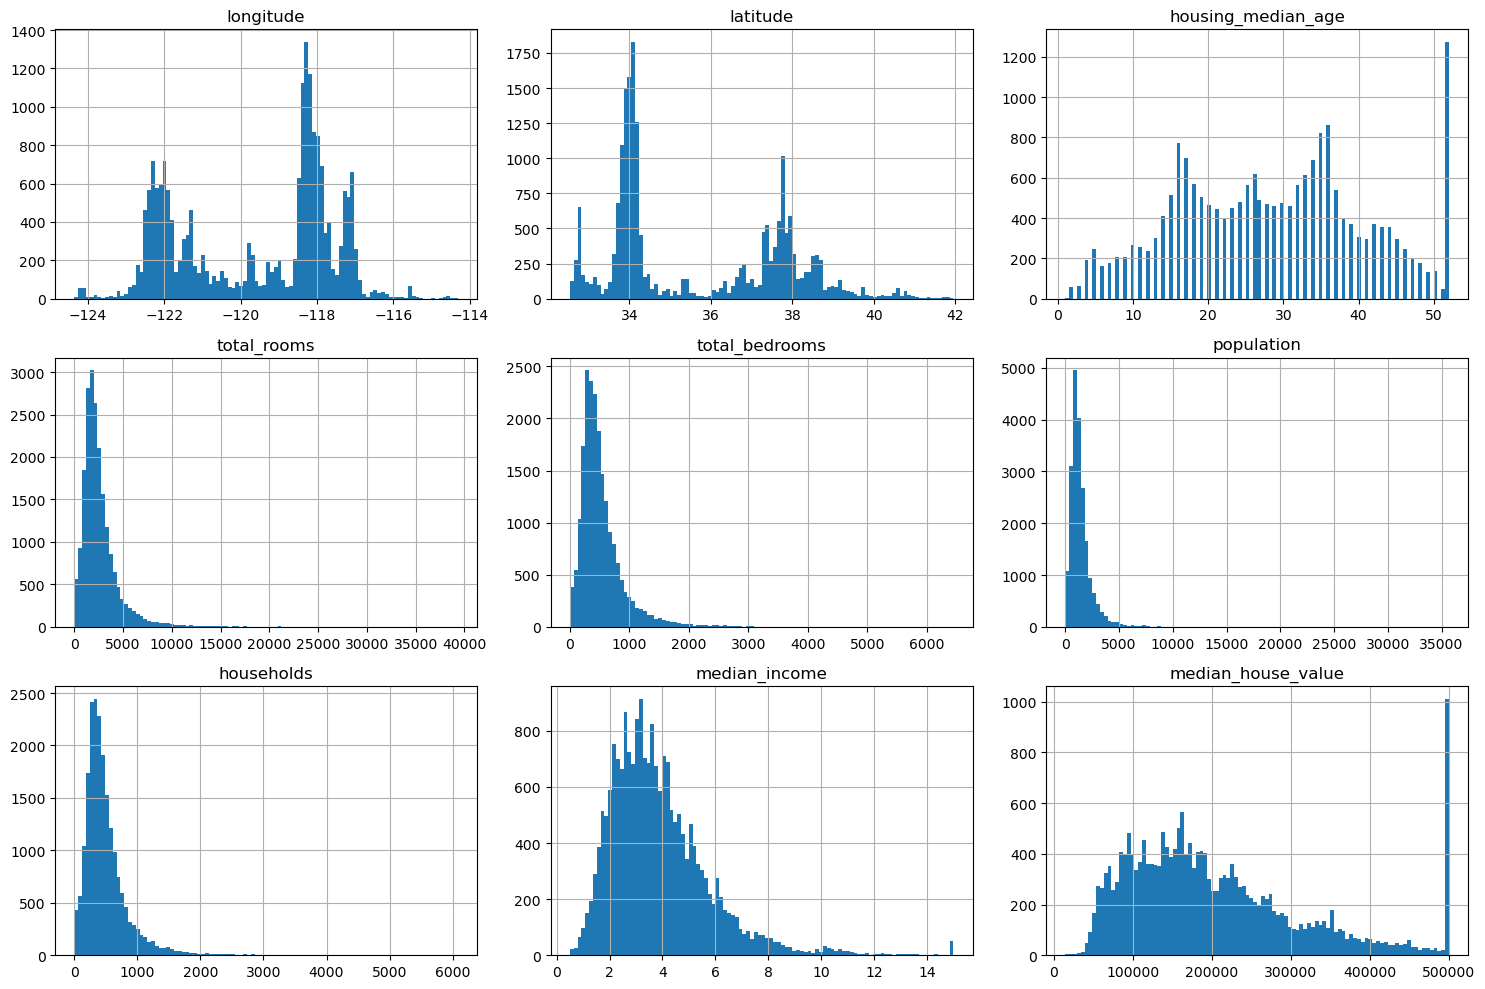

In [130]:
#Inspecting histograms

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
                                                  "population", "households", "median_income", "median_house_value"])
plt.tight_layout()
plt.show()

/Users/gaby/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


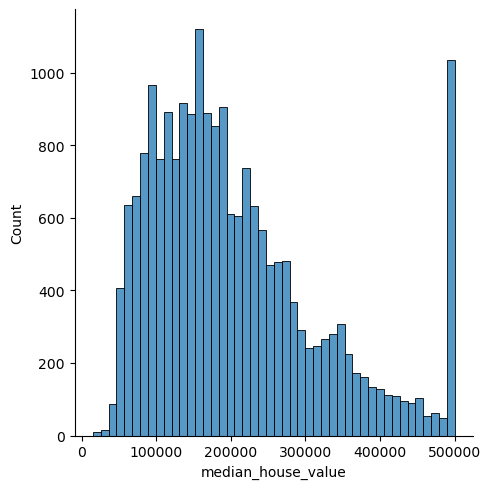

In [131]:
#INSPECTING HOUSE VALUES

#sns.displot(df.median_house_value)

sns.displot(df.median_house_value)

#always can be use histplot instead of displot

/Users/gaby/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


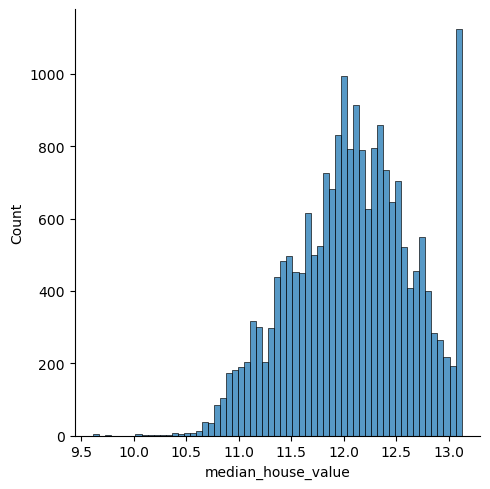

In [132]:
# applying log to the values and see if we get a better graph, 
#np.log1p() - applies log transformation to a variable and adds one to each result

sns.displot(np.log1p(df.median_house_value))

In [133]:

#@ FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [134]:
#Validation framework

#A splitting de dataset (in train/val/test sets, with 60%/20%/20% distribution.)
n=len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#B SHUFFLING DATASET(using seed=42):
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

#C PREPARING THE DATASET:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)




In [135]:

#D PREPARING THE LABELS:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

#4-Apply the log transformation to the median_house_value variable using the np.log1p() function.

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)
     

#3-the target value ('median_house_value') not have to be in the dataframe.

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']    



In [136]:
#E PREPARING THE DATASET:
check=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", 
       "population", "households", "median_income"]

#FDEFINING FUNCTION:
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X
     

In [137]:

#G FUNCTION FOR RMSE VALUES:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Q3:
1-We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
2-Use the validation dataset to evaluate the models and compare the RMSE of each option.
3-Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [138]:
#Option1: fill missing values with the mean of the variable

mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

# GETTING RMSE SCORE WITH 2 DECIMAL DIGITS:
np.round(rmse(y_val, y_mean_pred_val),2)


0.33

In [139]:
#Option 2: fill missing values with zero

X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

# GETTING RMSE SCORE WITH 2 DECIMAL DIGITS:
np.round(rmse(y_val, y_null_pred_val),2) 


0.33

In [140]:
#if rmse_zero < rmse_mean:
 #   print("The better option is replacing with zero")

#elif rmse_zero > rmse_mean:
 #   print("The better option is replacing with mean")

#else:
 #   print("Both are equally good options")

print("Both options are equally good")

Both options are equally good


Q4:  let's train a regularized linear regression.

For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

In [141]:
#FUNCTION FOR TRAINING A REGULARIZED LINEAR REGRESSION :
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [142]:

#@ INSPECTING THE RESULTS:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.686975241886483 0.33
1e-06 -11.686959176112268 0.33
0.0001 -11.685368865446438 0.33
0.001 -11.670931318453686 0.33
0.01 -11.528493585915717 0.33
0.1 -10.27450028213028 0.33
1 -4.920480897680299 0.33
5 -1.4820957456183999 0.34
10 -0.7899311832350284 0.34


Q5: We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

1-Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
2-For each seed, do the train/validation/test split with 60%/20%/20% distribution.
3-Fill the missing values with 0 and train a model without regularization.
4-For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
5-What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

In [146]:
#@ CHECKING THE RMSE SCORES:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -11.900382138174635 0.34
1 -11.732757372799634 0.34
2 -11.806729360149879 0.33
3 -11.587900347707404 0.34
4 -11.389470587903698 0.34
5 -11.447114275652794 0.34
6 -11.370516351449357 0.35
7 -12.473448918071782 0.34
8 -11.800287429213519 0.35
9 -11.459046830337236 0.34


In [147]:

#@ INSPECTING THE RMSE LIST:
rmse_list

#@ INSPECTING THE RMSE:
np.round(np.std(rmse_list),3)

0.005

Q6:

Split the dataset like previously, use seed = 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001
What's the RMSE on the test dataset?

In [148]:

#@ INITIALIZING SEED=9 AND REGULARIZATION:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

#Combine train and validation datasets
frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']
     

In [149]:
#@ INSPECTING RMSE:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35